In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("iris.csv")

In [9]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
Sepal.Width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
Petal.Length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
Species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.groupby("Species").describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [13]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

<Figure size 640x480 with 0 Axes>

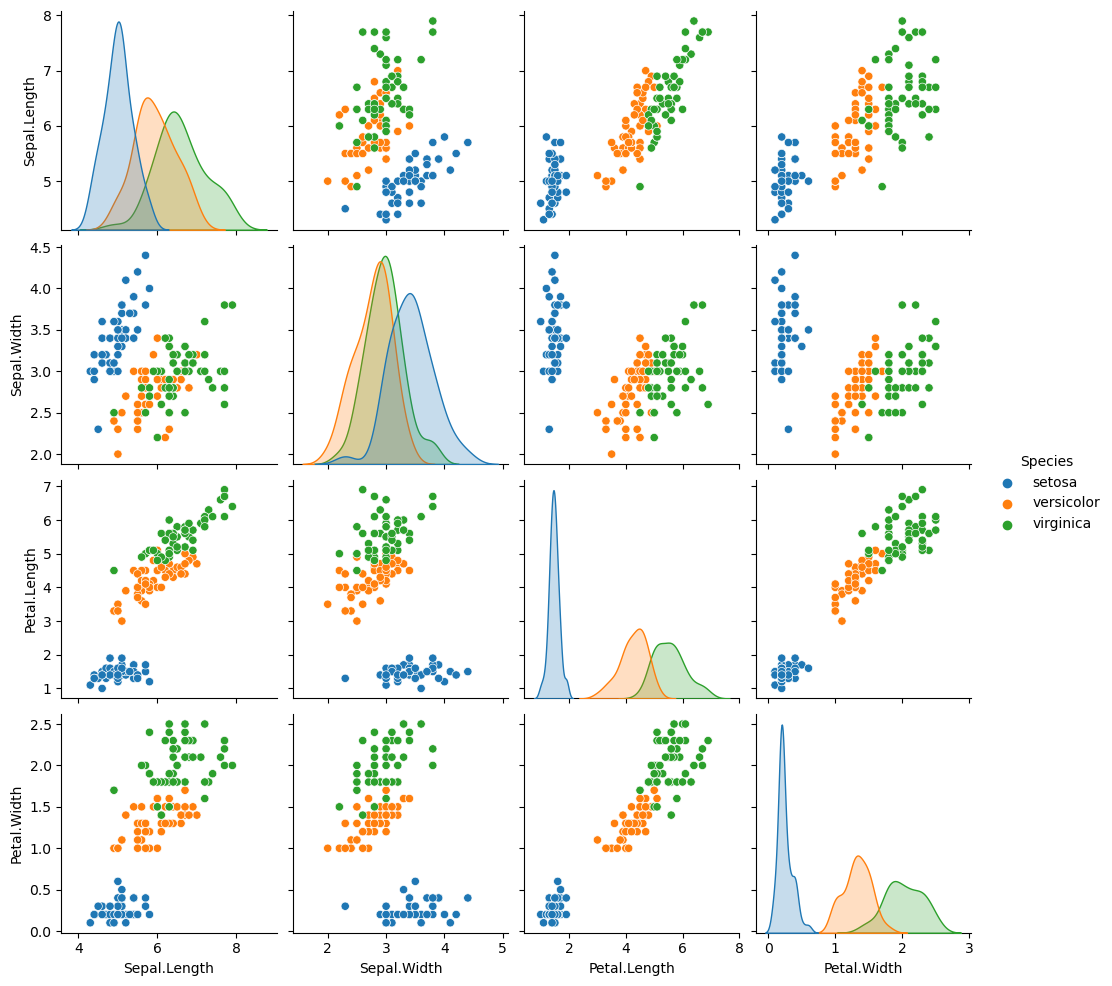

In [15]:
plt.figure()
sns.pairplot(data=df,hue="Species")
plt.show()

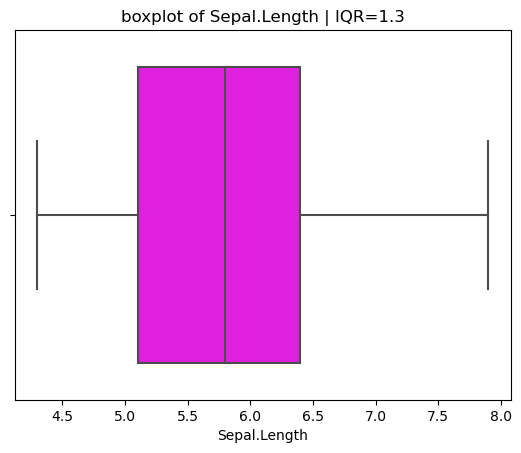

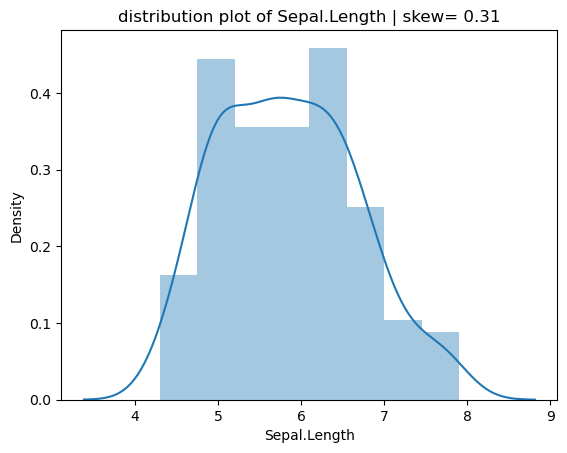

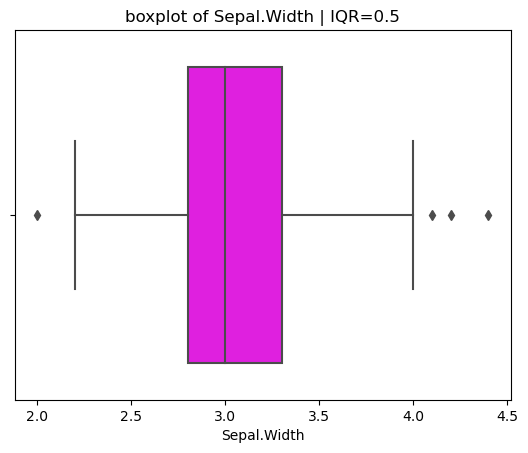

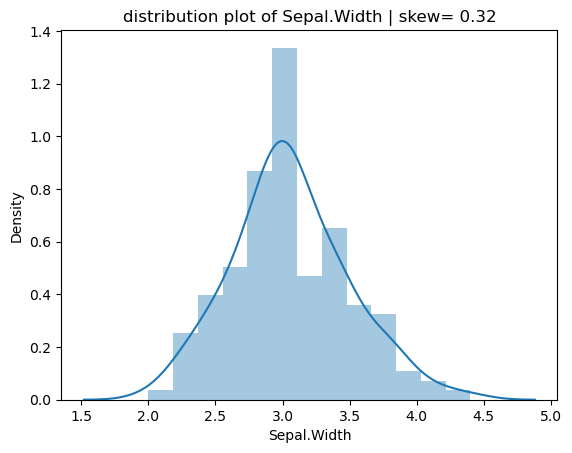

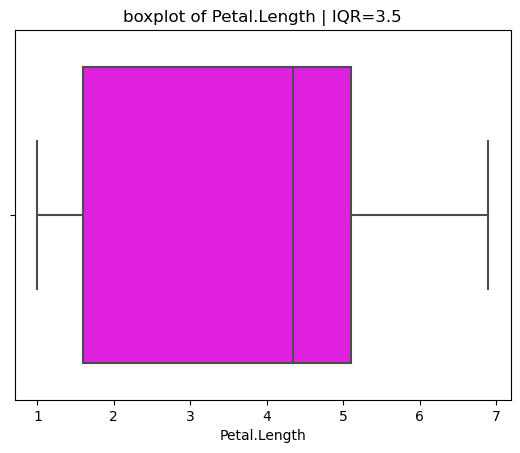

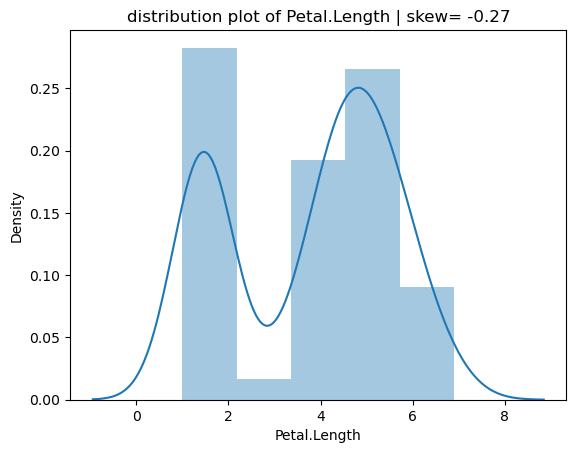

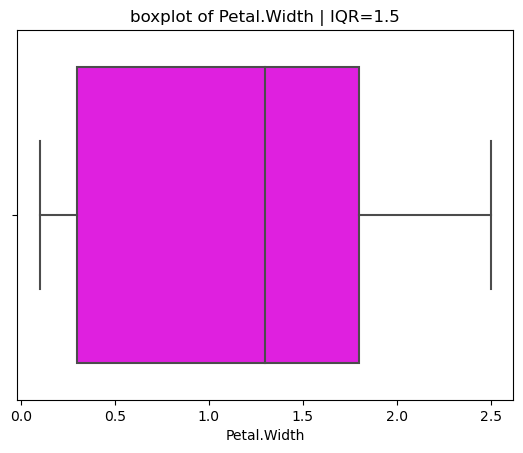

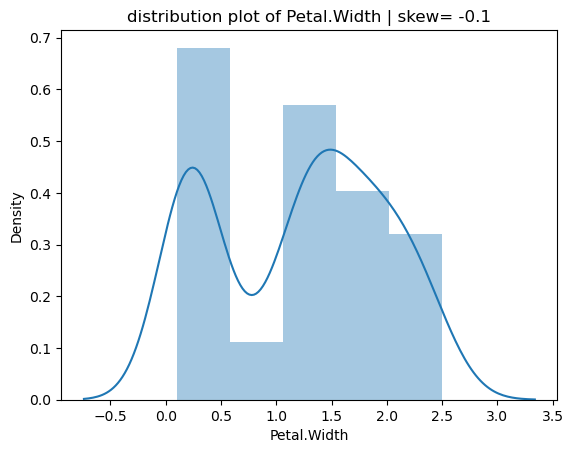

In [19]:
for i in df.columns[0:4]:
    plt.figure()
    sns.boxplot(df[i],color="magenta")
    Q3= df[i].quantile(0.75)
    Q1= df[i].quantile(0.25)
    IQR=round((Q3-Q1),2)
    plt.title(f"boxplot of {i} | IQR={IQR}")
    plt.figure()
    sns.distplot(df[i])
    skew=round(df[i].skew(),2)
    plt.title(f"distribution plot of {i} | skew= {skew}")
    plt.show()

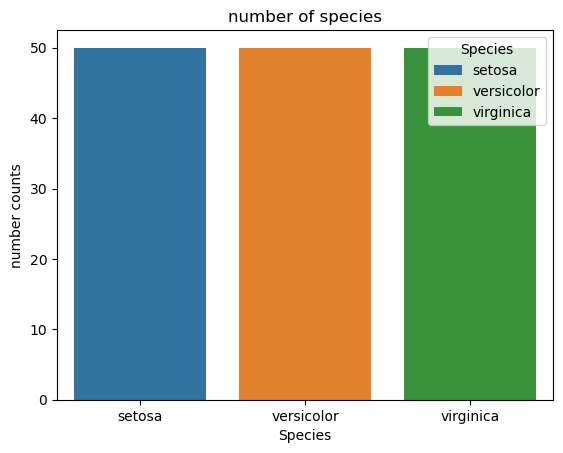

In [21]:
plt.figure()
sns.countplot(df["Species"],hue=df["Species"], dodge=False)
plt.title("number of species")
plt.ylabel("number counts")
plt.show()

([<matplotlib.patches.Wedge at 0x198effdda60>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

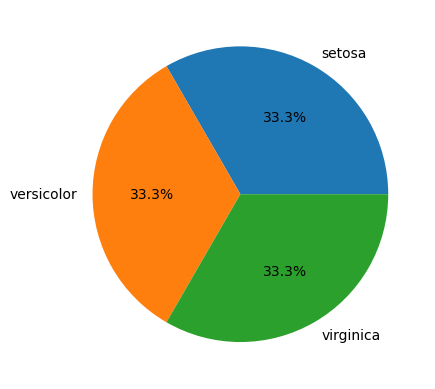

In [26]:
plt.figure()
plt.pie(x= df["Species"].value_counts(), labels= df["Species"].unique(),autopct="%1.1f%%")

In [32]:
from scipy.stats import f_oneway

for i in df.columns[0:4]:
    group1= df[df["Species"]=="virginica"][i]
    group2= df[df["Species"]=="versicolor"][i]
    group3= df[df["Species"]=="setosa"][i]
    ANOVA= f_oneway(group1, group2, group3)
    print(f"The ANOVA result for {i} is:")
    print(f"F Value is: {ANOVA.statistic: .3f}")
    print(f"P-value is: {ANOVA.pvalue: .3f}")

The ANOVA result for Sepal.Length is:
F Value is:  119.265
P-value is:  0.000
The ANOVA result for Sepal.Width is:
F Value is:  49.160
P-value is:  0.000
The ANOVA result for Petal.Length is:
F Value is:  1180.161
P-value is:  0.000
The ANOVA result for Petal.Width is:
F Value is:  960.007
P-value is:  0.000


In [34]:
from scipy.stats import shapiro

for i in df.columns[0:4]:
    normality= shapiro(df[i])
    print(f"the shapiro value of {i} is: ")
    print(f"{normality.statistic: .3f}")
    print(f"the p-value for this normality test of {i} variable is: ")
    print(f"{normality.pvalue: .3f}")

the shapiro value of Sepal.Length is: 
 0.976
the p-value for this normality test of Sepal.Length variable is: 
 0.010
the shapiro value of Sepal.Width is: 
 0.985
the p-value for this normality test of Sepal.Width variable is: 
 0.101
the shapiro value of Petal.Length is: 
 0.876
the p-value for this normality test of Petal.Length variable is: 
 0.000
the shapiro value of Petal.Width is: 
 0.902
the p-value for this normality test of Petal.Width variable is: 
 0.000
